In [1]:
# basic libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# statistical tools
from scipy import stats


In [2]:
# Load Cleaned Datasets

import pandas as pd

# Define file paths (cleaner and reusable)
TRAIN_PATH = "/workspaces/Classification/Data/Cleaned Data/df_train_1.csv"
TEST_PATH  = "/workspaces/Classification/Data/Cleaned Data/df_test.csv"

# Read the cleaned train and test datasets
df_train_1 = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

print(f"Train shape: {df_train_1.shape}")
print(f"Test shape:  {df_test.shape}")

Train shape: (37488, 33)
Test shape:  (12497, 33)


In [3]:
df_train_1.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
0,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
1,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
2,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0


In [4]:
df_test.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
0,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
1,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0
2,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,2022-08-06,2022-08-21,3,0,76,0,0,6,82,0


## EDA Start here

In [5]:
columns_continous = ['age','income','number_of_dependants','years_at_current_address','sanction_amount',
                     'loan_amount','processing_fee','gst','net_disbursement','loan_tenure_months','principal_outstanding',
                     'number_of_open_accounts','number_of_closed_accounts','total_loan_months','delinquent_months','total_dpd',
                     'enquiry_count','credit_utilization_ratio']
columns_categorical = ['gender','marital_status','employment_status','residence_type','city','state','zipcode',
                       'loan_purpose','loan_type','default']

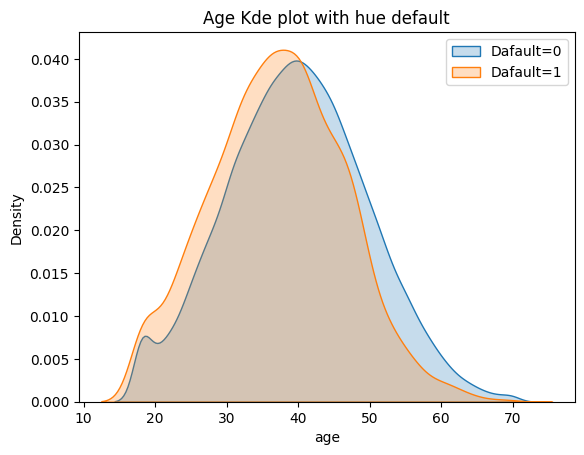

In [6]:
sns.kdeplot(df_train_1[df_train_1.default==0]['age'], fill=True, label= "Dafault=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['age'], fill=True, label= "Dafault=1")
plt.title(f"Age Kde plot with hue default")
plt.legend()
plt.show()

### Insight: Age Distribution vs. Default Status

**Observation:**  
The KDE plot illustrates the age distribution of individuals segmented by their default status (`Default = 0` vs. `Default = 1`).

- Both groups show a **similar bell-shaped distribution**, centered roughly between **35–40 years**, suggesting this is the most common age range among customers.  
- The **Default = 1** group (orange curve) has **higher density between 25–40 years**, indicating that **younger individuals are more prone to default**.  
- The **Default = 0** group (blue curve) shows relatively higher density for **ages 40 and above**, implying **older individuals tend to repay more reliably**.  
- Beyond age 55, both curves decline, meaning defaults are less frequent among older customers due to fewer records in that range.


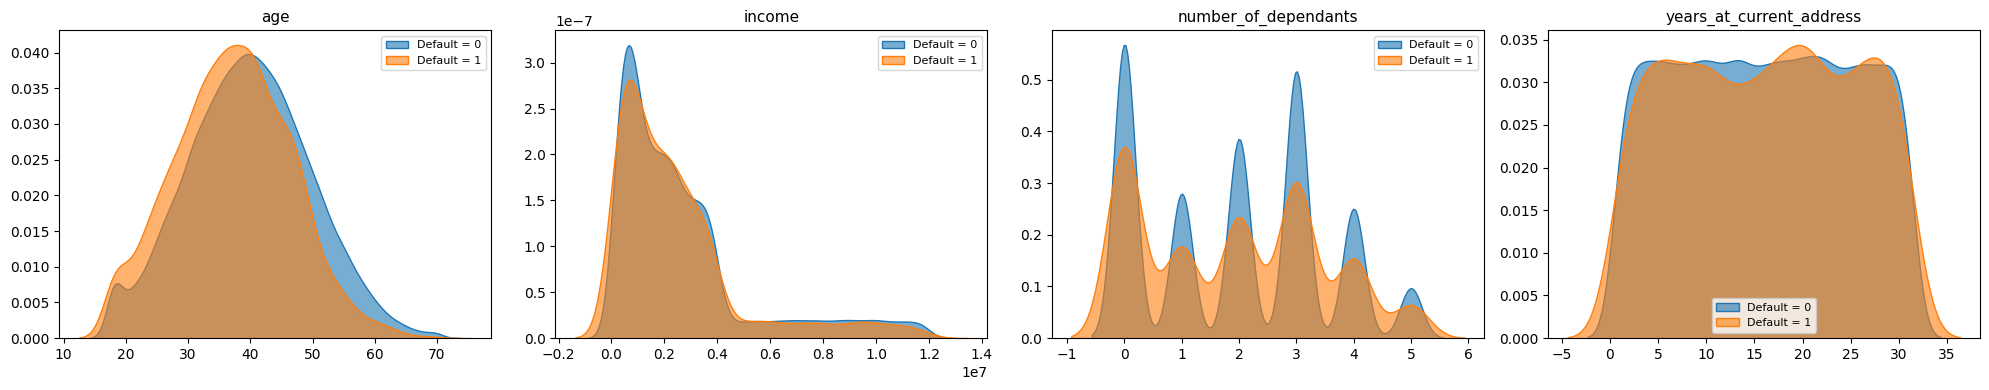

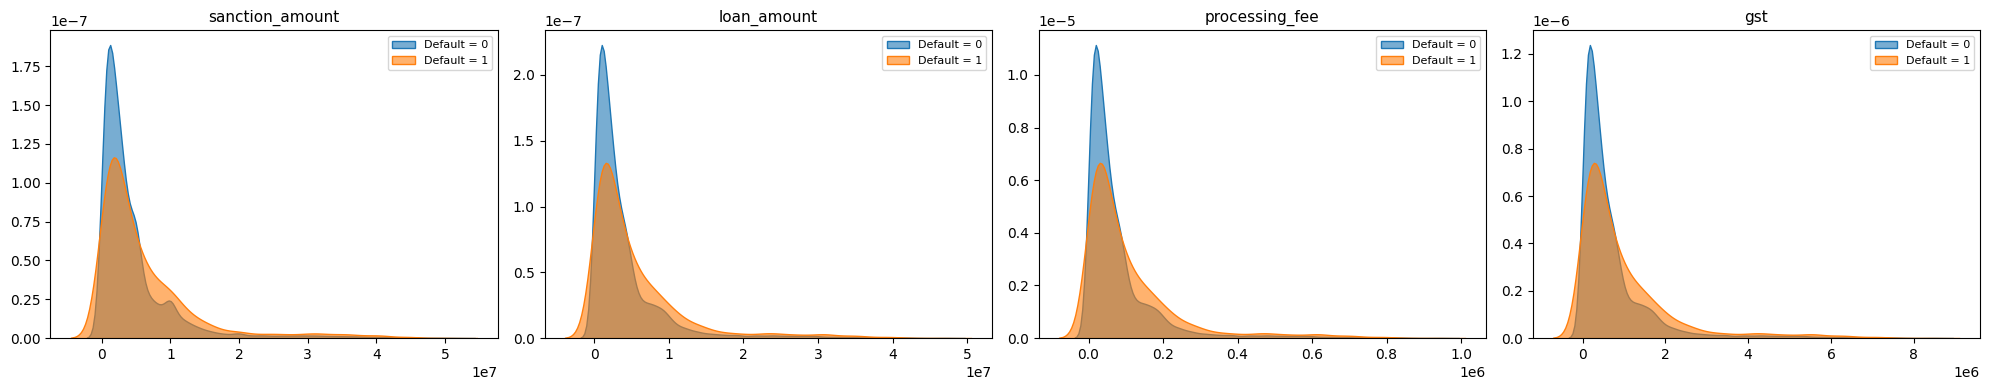

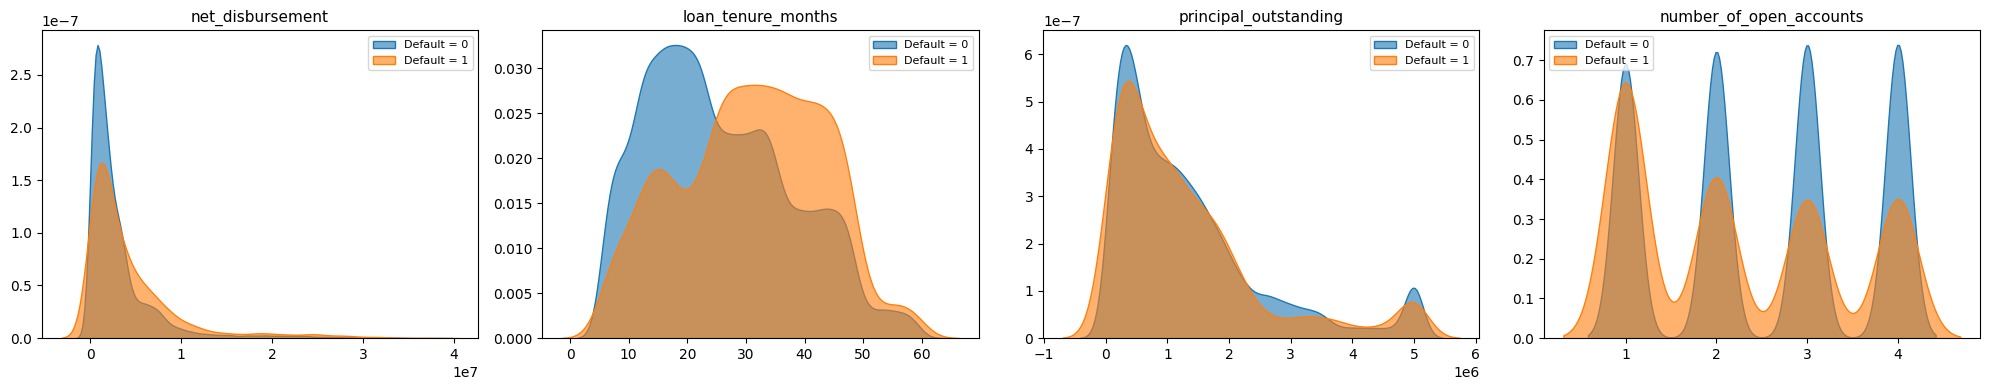

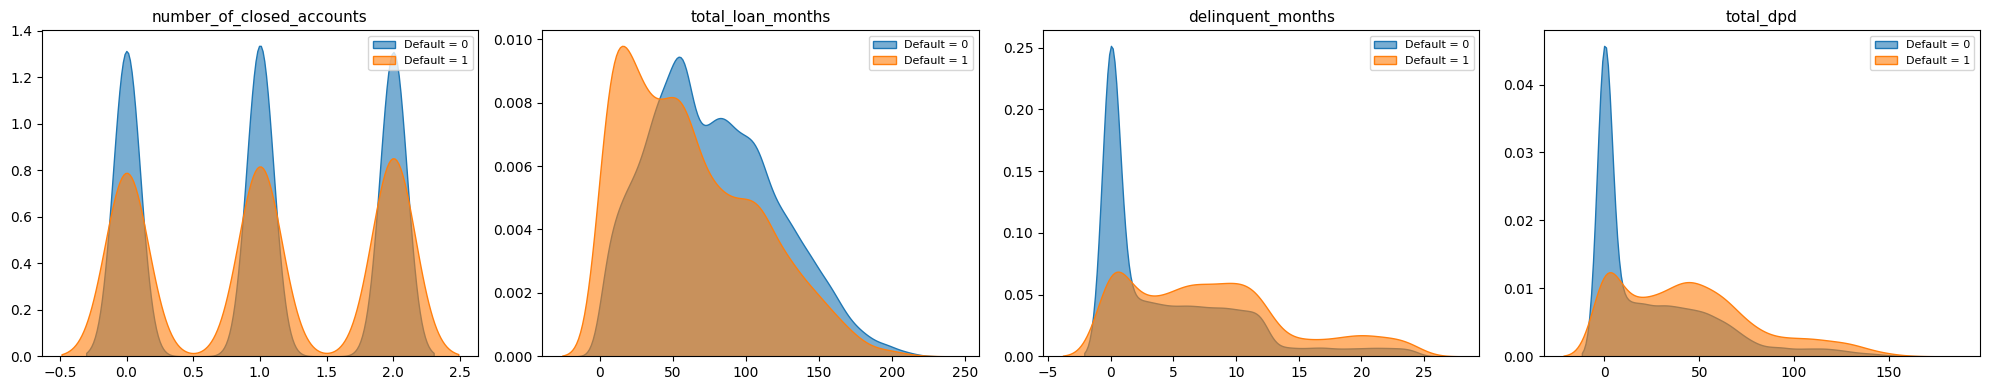

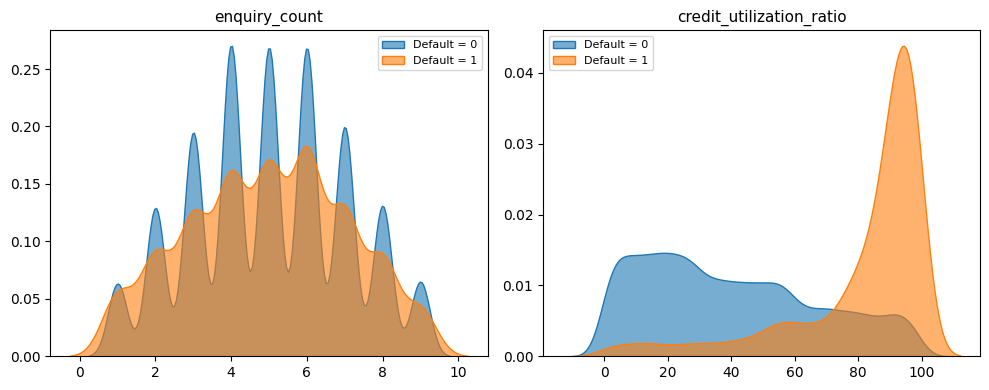

In [7]:
import numpy as np

plots_per_row = 4
num_cols = len(columns_continous)

# Loop in groups of 4
for start in range(0, num_cols, plots_per_row):
    end = min(start + plots_per_row, num_cols)
    subset = columns_continous[start:end]
    
    fig, axes = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
    
    # Handle both single-axis and multiple-axis cases
    if len(subset) == 1:
        axes = [axes]
    
    for i, col in enumerate(subset):
        ax = axes[i]
        sns.kdeplot(df_train_1[df_train_1.default == 0][col], fill=True, label='Default = 0', ax=ax, alpha=0.6)
        sns.kdeplot(df_train_1[df_train_1.default == 1][col], fill=True, label='Default = 1', ax=ax, alpha=0.6)
        ax.set_title(f"{col}", fontsize=11)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend(fontsize=8)
    
    plt.tight_layout()
    plt.show()






## Insights from Continuous Feature Distributions (Default vs. Non-Default)

### 2. income
- Defaulting customers generally have **lower income levels** compared to non-defaulters.  
- The income distribution is **strongly right-skewed**, indicating that a small group of high-income borrowers dominate the upper range.

### 3. number_of_dependents
- The **default rate rises with more dependents**, suggesting that higher financial responsibilities may reduce repayment capacity.

### 4. years_at_current_address
- Both groups exhibit **almost identical distributions**.  
- The length of stay at the current address shows **weak or no relationship** with default behavior.

### 5. sanction_amount
- **Higher sanction amounts** tend to correlate with **lower default rates**.  
- Indicates that larger sanctioned loans are typically issued to **more creditworthy customers**.

### 6. loan_amount
- **Defaults peak at smaller loan amounts**, possibly due to **lenient screening** for low-value loans.  
- Borrowers with higher loan amounts seem to default less often.

### 7. processing_fee
- Defaulters cluster around **slightly higher processing fees**, possibly reflecting **higher-risk borrowers** being charged more.

### 8. gst
- Both default and non-default groups have **similar GST distributions**, showing this feature has **minimal predictive influence**.

### 9. net_disbursement
- Defaults are more frequent for **lower disbursement amounts**.  
- Suggests that **partial or small disbursements** might relate to higher risk.

### 10. loan_tenure_months
- **Shorter and mid-range tenures (20–40 months)** show higher default tendencies.  
- Long-tenure loans are more stable, often associated with **better borrower profiles**.

### 11. principal_outstanding
- **Higher outstanding principals** are linked with **fewer defaults**, likely due to **stricter approval** for large loans.

### 12. number_of_open_accounts
- Customers with **more open accounts** show **higher default probability**, implying potential **over-leverage or credit exposure**.

### 13. number_of_closed_accounts
- Defaulters tend to have **fewer closed accounts**, which may indicate **limited repayment history** or **shorter credit cycles**.

### 14. total_loan_months
- **Longer cumulative loan history** is associated with **lower default rates**.  
- Experienced borrowers exhibit greater repayment reliability.

### 15. delinquent_months
- Defaults are concentrated among customers with **multiple delinquent months**.  
- This feature serves as a **strong indicator of repayment risk**.

### 16. total_dpd (Days Past Due)
- Defaults **increase sharply at higher DPD values**.  
- A powerful **early warning signal** for potential defaulters.

### 17. enquiry_count
- Defaulters have **higher credit enquiry counts**, suggesting **credit-seeking behavior** before default.  
- A key **behavioral risk predictor**.

### 18. credit_utilization_ratio
- Customers with **credit utilization above 70%** show a much higher tendency to default.  
- Indicates that **over-utilization of credit lines** strongly correlates with financial stress and repayment issues.

<h2 style="text-align:center;">Feature Engineering</h2>


Business saying that loan to income ratio is better matric compared to loan amount and income as individual feature

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df_train_1["loan_to_income"] = round(df_train_1["loan_amount"]/ df_train_1["income"],2)
df_train_1["loan_to_income"].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

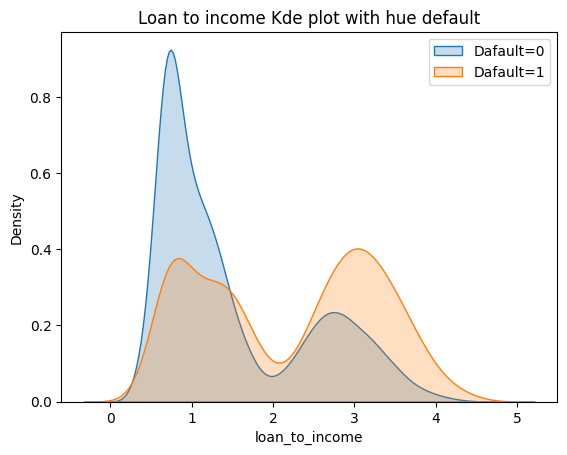

In [9]:
# To check the how much it has the influence on the credit risk
sns.kdeplot(df_train_1[df_train_1.default==0]['loan_to_income'], fill=True, label= "Dafault=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['loan_to_income'], fill=True, label= "Dafault=1")
plt.title(f"Loan to income Kde plot with hue default")
plt.legend()
plt.show()

### Insight

A higher **Loan-to-Income ratio (≥2.5)** strongly correlates with default, showing that heavier loan burdens increase risk.  
Borrowers with **lower ratios (<1.5)** manage repayments better, making **`loan_to_income`** a key predictor of default behavior.


In [10]:
pd.options.display.float_format = '{:.2f}'.format
df_train_1["delinquent_months"] = round(df_train_1["loan_amount"]/ df_train_1["income"],2)
df_train_1["loan_to_income"].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

In [11]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [14]:
df_train_1['delinquency_ratio'] =  (df_train_1["delinquent_months"] *100/ df_train_1["total_loan_months"]).round(1)
df_train_1[['delinquent_months','total_loan_months','delinquency_ratio']].head(3)

,delinquent_months,total_loan_months,delinquency_ratio
0,2.07,152,1.40
1,1.61,160,1.00
2,3.54,54,6.60
